## 6.4 WH Regression Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data preparation
#### 4. Regression analysis

### 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Option to ensure the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Data Analytics Immersion/Achievement 6/World_Happiness_Analysis'

In [6]:
# Import world happiness data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_combined_all_years.csv'), index_col = 0)

### 2. Data cleaning

In [7]:
df.columns

Index(['Country', 'Region', 'Year', 'Happiness_rank', 'Happiness_score',
       'GDP_capita', 'Social_support', 'Life_expectancy', 'Freedom',
       'Generosity', 'Corruption_perception'],
      dtype='object')

In [8]:
df.head(20)

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,Switzerland,Western Europe,2019,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,Sweden,Western Europe,2019,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,New Zealand,North America and ANZ,2019,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,Canada,North America and ANZ,2019,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,Austria,Western Europe,2019,10,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [9]:
df.shape

(741, 11)

##### Missing values

In [11]:
# Check for missing values

df.isnull().sum()

Country                  0
Region                   0
Year                     0
Happiness_rank           0
Happiness_score          0
GDP_capita               0
Social_support           0
Life_expectancy          1
Freedom                  0
Generosity               0
Corruption_perception    0
dtype: int64

In [12]:
# Impute missing values with median

df['Life_expectancy'].fillna(df['Life_expectancy'].median(), inplace=True)

In [13]:
# Last check for NaN

df.isnull().sum()

Country                  0
Region                   0
Year                     0
Happiness_rank           0
Happiness_score          0
GDP_capita               0
Social_support           0
Life_expectancy          0
Freedom                  0
Generosity               0
Corruption_perception    0
dtype: int64

##### Duplicates check

In [14]:
dups = df.duplicated()

In [15]:
dups.shape # No dups

(741,)

##### Extreme values checks

<Axes: xlabel='Happiness_score', ylabel='Density'>

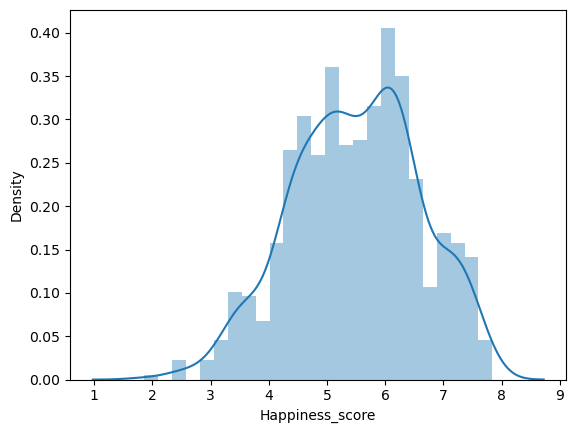

In [17]:
sns.distplot(df['Happiness_score'], bins=25) # Shows extreme values

# No extreme values detected.

In [18]:
df['Happiness_score'].mean() # Check the mean

5.499432792194332

In [19]:
df['Happiness_score'].median() # Check the median

5.533

In [38]:
df['Happiness_score'].max() # Check the max

7.842

In [39]:
df['Happiness_score'].min() # Check the min

1.859

### 3. Data preparation

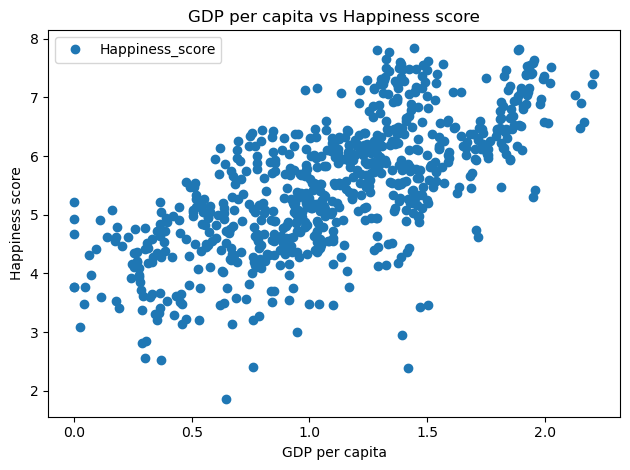

In [23]:
# Create a scatterplot using matplotlib to visually check how GDP per capita and happiness scores relate to each other.

df.plot(x = 'GDP_capita', y='Happiness_score', style='o')
plt.title('GDP per capita vs Happiness score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness score')
plt.tight_layout() 
plt.show()

#### Hypothesis to test:
The higher the GDP per capita of a country, the higher its happiness score.

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['GDP_capita'].values.reshape(-1,1)
y = df['Happiness_score'].values.reshape(-1,1)

In [25]:
X

array([[1.34      ],
       [1.383     ],
       [1.488     ],
       [1.38      ],
       [1.396     ],
       [1.452     ],
       [1.387     ],
       [1.303     ],
       [1.365     ],
       [1.376     ],
       [1.372     ],
       [1.034     ],
       [1.276     ],
       [1.609     ],
       [1.333     ],
       [1.499     ],
       [1.373     ],
       [1.356     ],
       [1.433     ],
       [1.269     ],
       [1.503     ],
       [1.3       ],
       [1.07      ],
       [1.324     ],
       [1.368     ],
       [1.159     ],
       [0.8       ],
       [1.403     ],
       [1.684     ],
       [1.286     ],
       [1.149     ],
       [1.004     ],
       [1.124     ],
       [1.572     ],
       [0.794     ],
       [1.294     ],
       [1.362     ],
       [1.246     ],
       [1.231     ],
       [1.206     ],
       [0.745     ],
       [1.238     ],
       [0.985     ],
       [1.258     ],
       [0.694     ],
       [0.882     ],
       [1.092     ],
       [1.162

In [26]:
y

array([[7.769     ],
       [7.6       ],
       [7.554     ],
       [7.494     ],
       [7.488     ],
       [7.48      ],
       [7.343     ],
       [7.307     ],
       [7.278     ],
       [7.246     ],
       [7.228     ],
       [7.167     ],
       [7.139     ],
       [7.09      ],
       [7.054     ],
       [7.021     ],
       [6.985     ],
       [6.923     ],
       [6.892     ],
       [6.852     ],
       [6.825     ],
       [6.726     ],
       [6.595     ],
       [6.592     ],
       [6.446     ],
       [6.444     ],
       [6.436     ],
       [6.375     ],
       [6.374     ],
       [6.354     ],
       [6.321     ],
       [6.3       ],
       [6.293     ],
       [6.262     ],
       [6.253     ],
       [6.223     ],
       [6.199     ],
       [6.198     ],
       [6.192     ],
       [6.182     ],
       [6.174     ],
       [6.149     ],
       [6.125     ],
       [6.118     ],
       [6.105     ],
       [6.1       ],
       [6.086     ],
       [6.07 

In [27]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [28]:
# Create a regression object

regression = LinearRegression()

In [29]:
# Fit the regression object to the training set

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Create a prediction for y on the test set

y_predicted = regression.predict(X_test)

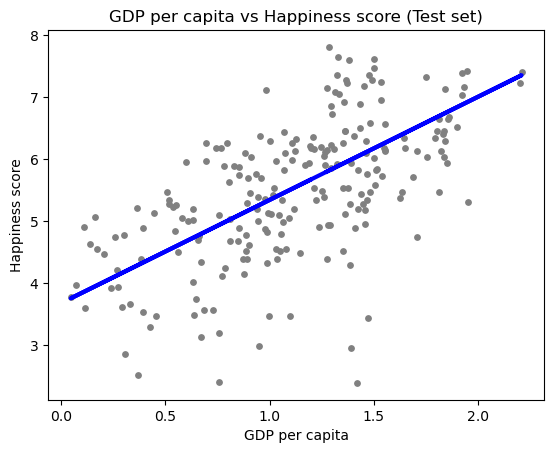

In [32]:
# Create a plot that shows the regression line on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness score')
plot_test.show()

#### Comment:
The linear model represented by the blue regression line doesn’t perfectly cover all of the data points, as there are many points far away from the regression line. For example, in the area where the GDP per capita is high (>1.5) there are still many data points that indicate lower happiness scores, which contradicts our hypothesis.
There seems to be a lot of variance in the data that can’t be explained by the linear relationship between the variables.

In [40]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # Root mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [41]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.6632311]]
Root mean squared error:  0.8212585641796499
R2 score:  0.36170522740630096


In [36]:
y_test

array([[6.21549988],
       [6.37559986],
       [7.054     ],
       [6.3       ],
       [5.269     ],
       [5.36      ],
       [3.52740002],
       [4.555     ],
       [7.163     ],
       [6.375     ],
       [6.174     ],
       [5.94      ],
       [5.89      ],
       [7.64559984],
       [6.25759983],
       [7.12139988],
       [6.65      ],
       [5.194     ],
       [5.536     ],
       [5.339     ],
       [4.82929993],
       [6.405     ],
       [4.90959978],
       [7.35349989],
       [5.342     ],
       [7.464     ],
       [6.12370014],
       [5.19439983],
       [6.334     ],
       [5.025     ],
       [7.278     ],
       [4.941     ],
       [6.041     ],
       [6.86350012],
       [5.074     ],
       [5.198     ],
       [6.259     ],
       [2.392     ],
       [5.43      ],
       [6.455     ],
       [4.39219999],
       [7.6       ],
       [4.67259979],
       [4.759     ],
       [3.615     ],
       [5.819     ],
       [7.228     ],
       [5.929

In [35]:
y_predicted

array([[5.66379603],
       [5.26315729],
       [5.89571756],
       [5.34851453],
       [4.54184744],
       [5.30693375],
       [4.33178431],
       [5.47658332],
       [6.89032975],
       [6.01214373],
       [4.91773767],
       [5.9888585 ],
       [5.06077555],
       [5.88565255],
       [4.83732535],
       [5.31043936],
       [6.69739495],
       [6.04873482],
       [5.96889973],
       [5.70943567],
       [5.32197664],
       [6.72566988],
       [3.85880888],
       [5.87781325],
       [4.54018421],
       [6.17514038],
       [5.54211732],
       [4.73248158],
       [6.41464566],
       [4.73478225],
       [5.94894095],
       [5.80922954],
       [6.59593785],
       [5.83391649],
       [3.94807394],
       [5.53313318],
       [5.52315379],
       [6.03542897],
       [6.07035682],
       [5.94395126],
       [5.13352974],
       [5.97887911],
       [5.08771668],
       [4.78135272],
       [4.16762045],
       [6.04873482],
       [7.33773892],
       [5.879

In [37]:
# Compare the predicted y values with the actual y values in a dataframe

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.2155,5.663796
1,6.3756,5.263157
2,7.0540,5.895718
3,6.3000,5.348515
4,5.2690,4.541847
5,5.3600,5.306934
6,3.5274,4.331784
7,4.5550,5.476583
8,7.1630,6.890330
9,6.3750,6.012144


#### Comment on model performance on the test set:
* The linear regression has a positive slope of 1.66, which means there is a strong positive relationship between the two variables - something that was already confirmed by the scatterplot.
* The root mean squared error (RMSE) is 0.821 and our target variable (happiness score) has a range of 7.842−1.859=5.983. This means the relative error percentage is approximately 0.821/5.983×100=13.73%.
* The r-squared value is 0.3617, which indicates that approximately 36.17% of the variance in the target variable is explained by our regression model. This means that while this model captures some of the variability in the data, **a significant portion (63.83%) of the variance is not explained by the model**.

#### Impact of possible data bias:
* **Size of the dataset:** it only has 741 total data points. These points are then split into a training set and a test set, further decreasing the number of points. This makes it harder to create an accurate model.
* **Selection bias:** GDP per capita values are sourced from multiple databases (WDI, Penn World Table, OECD, World Bank). Differences in how these sources calculate and report GDP can introduce inconsistencies.
* **Measurement bias:** GDP figures estimated using forecasts can introduce bias if the forecasts are not accurate. Different forecasting models (e.g., OECD vs. World Bank) might use varying assumptions and methodologies, leading to discrepancies.

##### Compare how the regression fits the training set

In [42]:
# Predict y_train based on X_train

y_predicted_train = regression.predict(X_train)

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print('Slope:' ,regression.coef_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.6632311]]
Root mean squared error:  0.564034522177757
R2 score:  0.5241145165909775


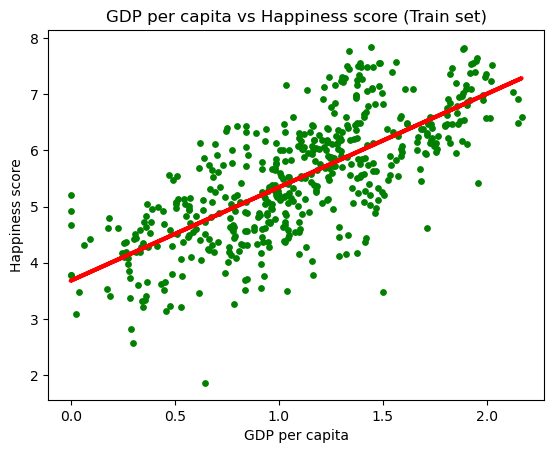

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness score')
plot_test.show()

#### Comment:
The r-squared value is now 0.5241, which indicates that approximately 52.41% of the variance in the target variable is explained by the regression model. This is a much better performance compared to the test set, where the R2 score is 0.3617. This could be a sign that we have **overfitted** our model.